In [2]:
!pip install openpyxl
!pip install unidecode
from sklearn.feature_extraction.text import CountVectorizer

# Detector de Fake News com BOW + Stop Words

In [3]:
import nltk.corpus
stopwords_br = nltk.corpus.stopwords.words('portuguese')

stopwords_br

['de',
 'a',
 'o',
 'que',
 'e',
 'é',
 'do',
 'da',
 'em',
 'um',
 'para',
 'com',
 'não',
 'uma',
 'os',
 'no',
 'se',
 'na',
 'por',
 'mais',
 'as',
 'dos',
 'como',
 'mas',
 'ao',
 'ele',
 'das',
 'à',
 'seu',
 'sua',
 'ou',
 'quando',
 'muito',
 'nos',
 'já',
 'eu',
 'também',
 'só',
 'pelo',
 'pela',
 'até',
 'isso',
 'ela',
 'entre',
 'depois',
 'sem',
 'mesmo',
 'aos',
 'seus',
 'quem',
 'nas',
 'me',
 'esse',
 'eles',
 'você',
 'essa',
 'num',
 'nem',
 'suas',
 'meu',
 'às',
 'minha',
 'numa',
 'pelos',
 'elas',
 'qual',
 'nós',
 'lhe',
 'deles',
 'essas',
 'esses',
 'pelas',
 'este',
 'dele',
 'tu',
 'te',
 'vocês',
 'vos',
 'lhes',
 'meus',
 'minhas',
 'teu',
 'tua',
 'teus',
 'tuas',
 'nosso',
 'nossa',
 'nossos',
 'nossas',
 'dela',
 'delas',
 'esta',
 'estes',
 'estas',
 'aquele',
 'aquela',
 'aqueles',
 'aquelas',
 'isto',
 'aquilo',
 'estou',
 'está',
 'estamos',
 'estão',
 'estive',
 'esteve',
 'estivemos',
 'estiveram',
 'estava',
 'estávamos',
 'estavam',
 'estivera'

In [4]:
import pandas as pd

dataframe = pd.read_excel('FakeRecogna_no_removal_words.xlsx')
dataframe.head()

,Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
0,\n\nArthur Lira fraudou a votação sobre voto i...,Boato – Está comprovado que a votação sobre o ...,bomba lira fraudar o votação brasília explodir...,política,17/08/2021,\nEdgard Matsuki,https://www.boatos.org/politica/arthur-lira-fr...,0
1,WhatsApp agora permite silenciar conversas e g...,"Opção vinha sendo testada no aplicativo, e foi...",o whatsapp liberar quinta-feira atualização ap...,política,23/10/2020 10h02,Por G1,https://g1.globo.com/economia/tecnologia/notic...,1
2,"Com Lula, Bolsonaro e Ciro, Fortaleza vira mic...",NaN,debater propor o cidade o campanha prefeitura ...,política,27/10/2020 04h00,Carlos Madeiro,https://noticias.uol.com.br/eleicoes/2020/10/2...,1
3,Alesp aprova projeto que multa em até R$ 100 m...,NaN,o alesp assembleia legislativo paulo aprovar h...,saúde,10/02/2021 23h56,10/02/2021 23h56,https://noticias.uol.com.br/saude/ultimas-noti...,1
4,\n Não é verdade que Fauci sabia há 15 anos q...,Publicações compartilhadas dezenas de vezes de...,“ fauci aprovar o hidroxicloroquina haver ano ...,saúde,11/08/2020 às 20:45,AFP Austrália,https://checamos.afp.com//nao-e-verdade-que-fa...,0


In [5]:
dataframe.Noticia[0]

'bomba lira fraudar o votação brasília explodir votar impresso auditável perder roubar umar haver fraudar o votação o câmara deputar imaginar o eleição presidencial bomba bomba bomba bomba lira fraudar o votação brasília explodir'

## Word Cloud de Fake News

In [6]:
import re
import unidecode
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#notícias falsas
dataframe_fake = dataframe[dataframe["Classe"] == 0]

#1. transformar dataframe em uma lista com cada palavra do corpus separado
text = ''.join(word for word in dataframe_fake['Noticia'])

#2. remover stopwords
text_sem_stop = " ".join(word for word in text.split() if word not in stopwords_br)

#3. remover acentos e pontuação
text_sem_pont = unidecode.unidecode(text_sem_stop)
text_sem_pont = re.sub(r'[^\w\s]', '', text_sem_pont)

text_sem_pont[:1000]

'bomba lira fraudar votacao brasilia explodir votar impresso auditavel perder roubar umar haver fraudar votacao camara deputar imaginar eleicao presidencial bomba bomba bomba bomba lira fraudar votacao brasilia explodir fauci aprovar hidroxicloroquina haver ano curar coronavirus  titulo publicacao compartilhar facebook explicar atual conselheiro pandemia covid19 unir anthony fauci supostamente conhecer eficacia cloroquina hidroxicloroquina tratamento coronavirus ocultar texto justificar  virology journal publicacao oficial instituto nacional saudar dr fauci publicar artigo sucesso agostar cabecalho preparese  cloroquina potente inibidor infeccao disseminacao coronavirus sars   significar claro dr fauci foto haver ano cloroquina hidroxicloroquina derivar suave hcq tratar casar atual coronavirus  terapeutico  prevenir caso futuro  profilaticos  hcq funcionar curar vacinar palavra drogar maravilhoso coronavirus  continuar postagem pra variar esquerdo mentir foto video antigo paulista pra 

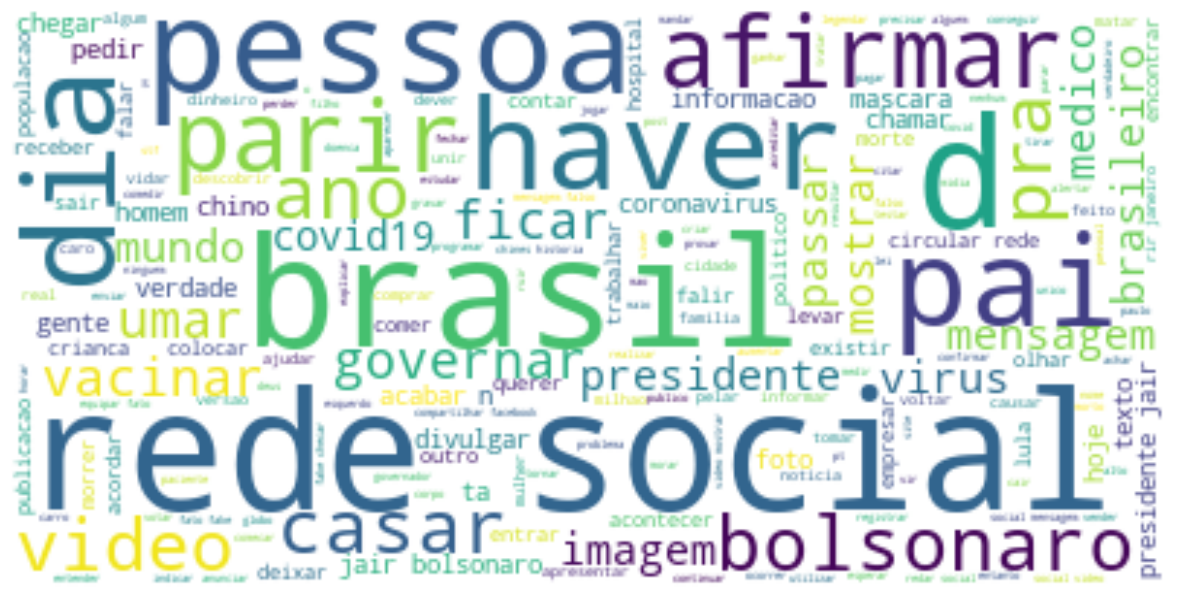

In [7]:
wordcloud = WordCloud(background_color="white").generate(text_sem_pont)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

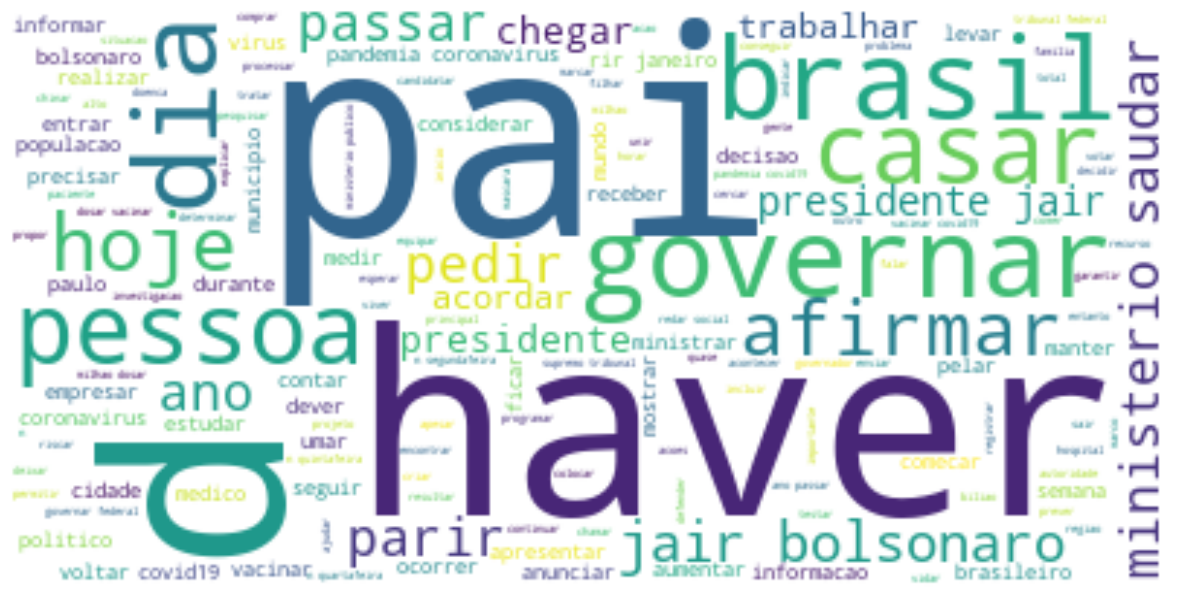

In [8]:
#notícias reais
dataframe_fake = dataframe[dataframe["Classe"] == 1]

#1. transformar dataframe em uma lista com cada palavra do corpus separado
text = ''.join(word for word in dataframe_fake['Noticia'])

#2. remover stopwords
text_sem_stop = " ".join(word for word in text.split() if word not in stopwords_br)

#3. remover acentos e pontuação
text_sem_pont = unidecode.unidecode(text_sem_stop)
text_sem_pont = re.sub(r'[^\w\s]', '', text_sem_pont)

wordcloud = WordCloud(background_color="white").generate(text_sem_pont)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Classificação

In [9]:
df_news_labels = dataframe[['Noticia', 'Classe']]

#remover linhas nulas
df_news_labels = df_news_labels.dropna()

df_news_labels.head()

,Noticia,Classe
0,bomba lira fraudar o votação brasília explodir...,0
1,o whatsapp liberar quinta-feira atualização ap...,1
2,debater propor o cidade o campanha prefeitura ...,1
3,o alesp assembleia legislativo paulo aprovar h...,1
4,“ fauci aprovar o hidroxicloroquina haver ano ...,0


In [10]:
news = df_news_labels.Noticia

for i, d in news.items():
    text = " ".join(word for word in d.split())
    text = unidecode.unidecode(text) #remover acentuação
    text = re.sub(r'[^\w$\s]', '', text) #remover pontuação
    news.at[i] = text
    
labels = df_news_labels.Classe #0 = fake news; 1 = real news

0    5951
1    5951
Name: Classe, dtype: int64


<AxesSubplot: >

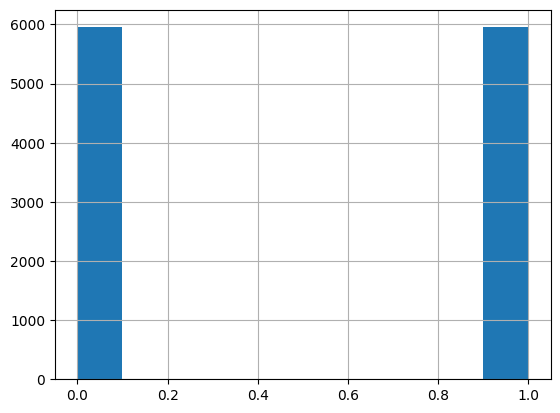

In [11]:
print(labels.value_counts())
labels.hist() #verificar balanceamento

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(news, labels, test_size = 0.1)
print(X_test)

6136     manha d sextafeira 2901 o ministerio saudar tr...
4221     o juiz marcelo bretas atua processar lavar jat...
8147     o afirmacao ganhar forcar compartilhamentos wh...
1700     o governador paulo joao doria psdb acreditar o...
11658    foto circular rede social mostrar homem pedaco...
                               ...                        
9951     o organizacao nacao unir o educacao o ciencia ...
2681     texto ditadura comunista chines o vacinar comu...
1527     cercar 15 italiano bloquear brasil dever o res...
6165      luciano hang havan mandar cilindro oxigenio m...
8286     o tecnico tribunal contar uniao tcu apurar o o...
Name: Noticia, Length: 1191, dtype: object


In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

bow_model = CountVectorizer(stop_words = stopwords_br)
X_train = bow_model.fit_transform(X_train)
X_test = bow_model.transform(X_test)

In [14]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [15]:
print("Acurácia do treino:", model.score(X_train, y_train))
print("Acurácia do teste:", model.score(X_test, y_test))

Acurácia do treino: 0.9522920362244421
Acurácia do teste: 0.9177162048698573


# Média após 100 tentativas

In [16]:
from tqdm import tqdm

sum_train = 0
sum_test = 0
for i in tqdm(range(200)):
    X_train, X_test, y_train, y_test = train_test_split(news, labels, test_size = 0.1)
    bow_model = CountVectorizer(stop_words = stopwords_br)
    X_train = bow_model.fit_transform(X_train)
    X_test = bow_model.transform(X_test)
    model = MultinomialNB()
    model.fit(X_train, y_train)
    
    sum_train += model.score(X_train, y_train)
    sum_test += model.score(X_test, y_test)

print(sum_train/200, sum_test/200)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [02:18<00:00,  1.44it/s]

0.9513500140042959 0.919958018471875


# Referências

* https://repositorio.unesp.br/handle/11449/234317
* https://github.com/Gabriel-Lino-Garcia/FakeRecogna
* https://thecleverprogrammer.com/2021/11/11/word-cloud-from-a-pandas-dataframe-in-python/
* https://www.udemy.com/course/natural-language-processing-in-python/
* https://medium.com/co-learning-lounge/nlp-word-embedding-tfidf-bert-word2vec-d7f04340af7f
* https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/
* https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
* https://machinelearningmastery.com/gentle-introduction-bag-words-model/